## Multi-Class Classification: Newswires

#### Loading the dataset

In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters

In [2]:
# importing data from keras
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


#### Decoding newswires

In [5]:
# maps words to an integer index
word_index = reuters.get_word_index()

# maps integer indices to words
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3 , '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

#### Preparing the data

In [6]:
def vectorize_sequence(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [7]:
# Vectorize the training and testing datasets
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [9]:
# Hot-encode the target attributes
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

#### Building the network

In [10]:
# Import keras libraries
from keras import models, layers, losses, metrics, optimizers

Using TensorFlow backend.


In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
# compiling the model
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#### Validating the model

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 188us/step - loss: 2.5322 - accuracy: 0.4955 - val_loss: 1.7208 - val_accuracy: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 140us/step - loss: 1.4452 - accuracy: 0.6879 - val_loss: 1.3459 - val_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.0953 - accuracy: 0.7651 - val_loss: 1.1708 - val_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.8697 - accuracy: 0.8165 - val_loss: 1.0793 - val_accuracy: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.7034 - accuracy: 0.8472 - val_loss: 0.9844 - val_accuracy: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.5667 - accuracy: 0.8802 - val_loss: 0.9411 - val_accuracy: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 137us/step - loss

#### Plotting the training and validation loss and accuracy

In [18]:
import matplotlib.pyplot as plt

In [19]:
history_dict = history.history

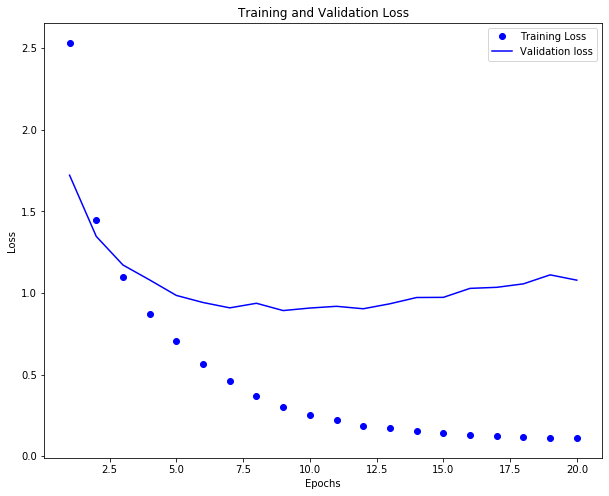

In [20]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(acc)+ 1)

plt.figure(figsize=(10,8))
plt.plot(epochs, loss_values,  'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

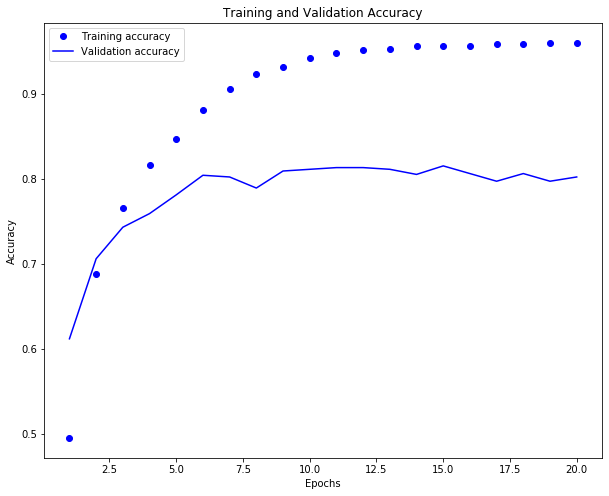

In [21]:
plt.figure(figsize=(10,8))
plt.plot(epochs, acc,  'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Retraining a model from scratch

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 160us/step - loss: 2.5398 - accuracy: 0.5226 - val_loss: 1.6733 - val_accuracy: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 130us/step - loss: 1.3712 - accuracy: 0.7121 - val_loss: 1.2758 - val_accuracy: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 135us/step - loss: 1.0136 - accuracy: 0.7781 - val_loss: 1.1303 - val_accuracy: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.7976 - accuracy: 0.8251 - val_loss: 1.0539 - val_accuracy: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.6393 - accuracy: 0.8624 - val_loss: 0.9754 - val_accuracy: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 137us/step - loss: 0.5124 - accuracy: 0.8921 - val_loss: 0.9102 - val_accuracy: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 137us/step - loss: 0.412

In [24]:
results = model.evaluate(x_test, y_test)
results

2246/2246 [==============================] - 0s 172us/step


[1.02833829537525, 0.7756010890007019]

In [25]:
##random classification baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

#### Prediction on new data

In [26]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [27]:
np.sum(predictions[0])

0.9999999

In [28]:
np.argmax(predictions[0])

3

#### Retraining a model for better-fit and increasing accuracy

In [29]:
y_train2 = np.array(train_labels)
y_test2 = np.array(test_labels)

y_val2 = y_train2[:1000]
partial_y_train2 = y_train2[1000:]

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train2,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val2), verbose = False)
results = model.evaluate(x_test, y_test2)
results

2246/2246 [==============================] - 0s 158us/step


[0.952881737256411, 0.7876224517822266]